# Regression
## Linear Regression
Over the last few chapters this kind of model has been discussed in detail over and over again.

This time we implement a linear regression model for supervised learning using `sklearn`.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = (np.random.normal(0.0, 0.1, 200) + 2) * 25
df = df.reshape((100, 2))
df[:,0] += 2.3

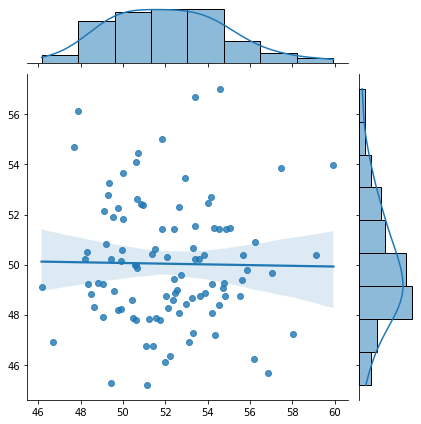

In [3]:
sns.jointplot(x=df[:,0], y=df[:,1], data=df, kind='reg')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[:,0], df[:,1], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (80, 1)
Test - Predictors shape (20, 1)
Train - Target shape (80, 1)
Test - Target shape (20, 1)


In [5]:
cls = linear_model.LinearRegression()
#Fit method is used for fitting your training data into the model
cls.fit(x_train,y_train)

LinearRegression()

In [6]:

prediction = cls.predict(x_test)
cls.get_params()
print('Co-efficient of linear regression',cls.coef_)
print('Intercept of linear regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Co-efficient of linear regression [[-0.04105967]]
Intercept of linear regression model [52.23964948]
Mean Square Error 4.937643585388273
Model R^2 Square value -0.03820509443520792


Text(0.5, 1.0, 'Linear Regression')

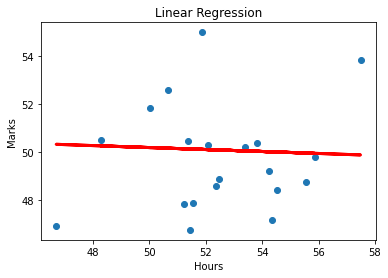

In [7]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

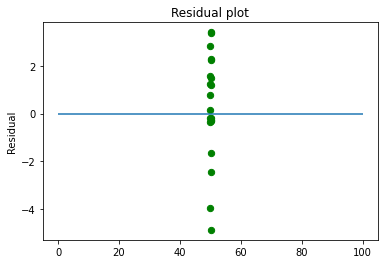

In [8]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

## Poisson Regression

unfortunately the Possion Regression is implemented in `sklearn>=0.23` and colab uses `sklearn==0.22`

In [16]:
cls = linear_model.PoissonRegressor()
#Fit method is used for fitting your training data into the model
cls.fit(x_train, y_train.ravel())

PoissonRegressor()

In [18]:
prediction = cls.predict(x_test)
cls.get_params()
print('Co-efficient of poisson regression',cls.coef_)
print('Intercept of poisson regression model',cls.intercept_)
print('Mean Square Error', metrics.mean_squared_error(y_test, prediction))
print('Model R^2 Square value', metrics.r2_score(y_test, prediction))

Co-efficient of poisson regression [-0.00081783]
Intercept of poisson regression model 3.9566361822172245
Mean Square Error 4.9374207430939006
Model R^2 Square value -0.03815823888533432


Text(0.5, 1.0, 'Poisson Regression')

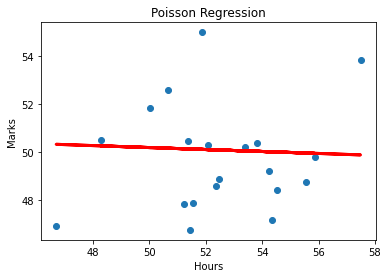

In [20]:
#Model Regression line on test set
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Marks')

plt.title('Poisson Regression')